In [5]:
import torch
from fastai.vision.all import *
from fastai.vision import *
import matplotlib.image as mpimg

In [ ]:
if os.name == 'nt':
    import pathlib
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath

In [6]:
def get_x(r): return PATH+r['ImageId']+".jpg"
def get_y(r): return r['ClassId'].split(',')

In [7]:
def splitter(df):
    train = df.index[df['is_valid']==0].tolist()
    valid = df.index[df['is_valid']==1].tolist()
    return train,valid

In [8]:
class LabelSmoothingBCEWithLogitsLossFlat(BCEWithLogitsLossFlat):
    def __init__(self, eps:float=0.1, **kwargs):
        self.eps = eps
        super().__init__(thresh=0.2, **kwargs)
    
    def __call__(self, inp, targ, **kwargs):
        # https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/166833#929222
        targ_smooth = targ.float() * (1. - self.eps) + 0.5 * self.eps
        return super().__call__(inp, targ_smooth, **kwargs)
    
    def __repr__(self):
        return "FlattenedLoss of LabelSmoothingBCEWithLogits()"

In [2]:
def predict_attribute(model, path, display_img=True):
    predicted = model.predict(path)
    if display_img:
        size = 244,244
        img=Image.open(path)
        img.thumbnail(size,Image.ANTIALIAS)
        imgplot = mpimg.imread(path)
        plt.imshow(imgplot)
    return predicted[0]

In [9]:
model = torch.load('myModel.pth')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


(#4) ['collar','hood','pocket','sleeve']

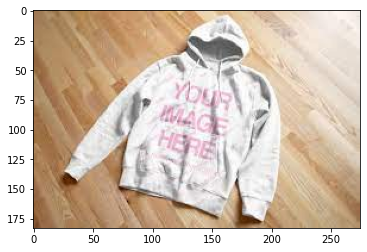

In [34]:
image_path = 'testing/test4.jpg'
predict_attribute(model, image_path)

In [17]:
prob_result = model.predict(image_path)

In [30]:
prob_result

((#4) ['collar','hood','pocket','sleeve'],
 TensorBase([ True, False,  True, False, False,  True,  True]),
 TensorBase([0.9501, 0.0590, 0.3070, 0.0157, 0.0642, 0.5239, 0.9699]))

In [33]:
prob_result[1][6].item()

True

In [35]:
l = model.predict('/Users/johaninho/Desktop/BIHARproj/CETIA/fashionpedia-api/images/000000010223.jpg')

In [36]:
print(l)

(['collar', 'pocket', 'sleeve'], TensorBase([ True, False, False, False, False,  True,  True]), TensorBase([0.9647, 0.0890, 0.0566, 0.1061, 0.1127, 0.6726, 0.9003]))
